# Práctica 3 - Gradiente, Combinador Lineal y Regresión

El objetivo de esta práctica es comprender el funcionamiento del descenso del gradiente y los combinadores lineales.

**Temas**
* Optimización con descenso del gradiente.
* Regresión lineal simple y múltiple.
* Regresión logística multiclase

# Imports

In [2]:
from google.colab import drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
FUENTES_DIR = '/content/drive/MyDrive/DeepLearning-colab/Fuentes-20240901'
DATOS_DIR = '/content/drive/MyDrive/DeepLearning-colab/Datos-20240901'      # carpeta donde se encuentran los datasets
# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from ClassNeuronaLineal import NeuronaLineal
from ClassNeuronaGral import NeuronaGradiente
from ClassRNMulticlase import RNMulticlase
from sklearn.preprocessing import OneHotEncoder

# Optimización de funciones utilizando la técnica del descenso de gradiente

## Ejercicio 2

El precio de una vivienda está dado por dos factores, la proximidad a centros comerciales, financieros, vías y demás que se mide a través del factor j, y de la condición misma de la vivienda que se mide por el factor k.
La relación entre estos factores y el precio de la vivienda en un barrio determinado está dada por:

<p align= center>𝑃 (𝑗, 𝑘) = 𝑘 2 − 2𝑗𝑘 + 2𝑗 2 + 18𝑗 − 20𝑘 + 201 </p>

donde el precio está dado en miles de dólares.
Utilice la técnica de descenso de gradiente para determinar los valores de j y k que minimizan el precio de la vivienda.

Paso 1: Calcular las derivadas parciales

  $\mathrm P(j,k)={k² - 2jk + 2j² + 18j + 20k + 201}$

<p> Derivada de P respecto de j</p>


  $\delta P \mid \delta j = 0 - 2*1k + 2*2j + 18*1 + 0+0$

  $\delta P \mid \delta j = -2k+4j+18 $


<p> Derivada de P respecto de k</p>

  $\delta P \mid \delta j = 2k -2j*1 +0+0+20*1+0 $

  $\delta P \mid \delta j = 2k-2j+20 $


In [ ]:
def P(j, k):
  return k**2 - 2*j*k + 2*j**2 + 18*j - 20*k + 201

In [ ]:
# Calcular derivadas parciales
def dP_dj(j,k):
  return -2*k + 4*j +18

def dP_dk(j,k):
  return 2*k - 2*j - 20

In [ ]:
alpha = 0.1
max_iteraciones = 100
cota = 10e-05

(j,k,z,z_new) = (88,14, P(1,1), P(1,1)+1)

iteraciones = 0

while iteraciones < max_iteraciones and (abs(z_new -z) > cota):
  z = z_new

  gradiente_j = dP_dj(j,k)
  gradiente_k = dP_dk(j,k)

  j = j - alpha*gradiente_j
  k = k - alpha*gradiente_k

  z_new = P(j,k)
  iteraciones +=1

  # print(f"{iteraciones:>4} {j:>10.5f} {k:>10.5f} {P(j,k):8.2f}")

print(f'Ite: {iteraciones} \nValor óptimo de j:{j:8.5f} \nValor óptimo de k: {k:8.5f} \nPrecio mínimo: {(1000*P(j,k)):7.0f} dólares')


Ite: 90 
Valor óptimo de j: 1.01988 
Valor óptimo de k: 11.03217 
Precio mínimo:  100001 dólares


In [ ]:
dP_dj(1.01167,11.01888)

0.00892000000000337

In [ ]:
dP_dk(1.01167,11.01888)

0.014419999999997657

In [ ]:
P(1.01988 ,11.03217)

100.0005462585

## Ejercicio 3

A continuación, se presentan datos de entrenamiento y tiempo promedio de un recorrido de corredores para una distancia fija. Los datos están organizados en una tabla con las horas de entrenamiento semanales y el tiempo promedio en minutos para completar el recorrido:

<br>

 |Horas de entrenamiento|Tiempo Promedio (mins)|
 |----------------------|----------------------|
 |2|30.5|
 |3|29.3|
 |4|26.7|
 |4|26.0|
 |5|25.5|
 |6|24.7|
 |6|23.5|
 |7|23.0|
 |7|22.5|
 |8|21.0|
 |10|21.0|
 |10|20.5|

<br>
A partir de los datos de entrenamiento y tiempos de recorrido de los corredores, se desea obtener la recta de regresión que permita predecir el tiempo promedio que un corredor tardará en recorrer la distancia fija a partir de las horas de entrenamiento semanales. Responder:

###3.a)

Calcule la correlación lineal entre estas dos variables y dibuje el diagrama de dispersión correspondiente. ¿La recta de regresión será de utilidad?


In [22]:
horas_entrenamiento = np.array([2,3,4,4,5,6,6,7,7,8,10,10])
tiempo_promedio_en_mins = np.array([30.5, 29.3, 26.7, 26.0, 25.5, 24.7, 23.5, 23.0, 22.5,21.0, 21.0, 20.5])

In [23]:
correlacion = np.corrcoef(horas_entrenamiento, tiempo_promedio_en_mins)[0,1]
correlacion

-0.959746386006859

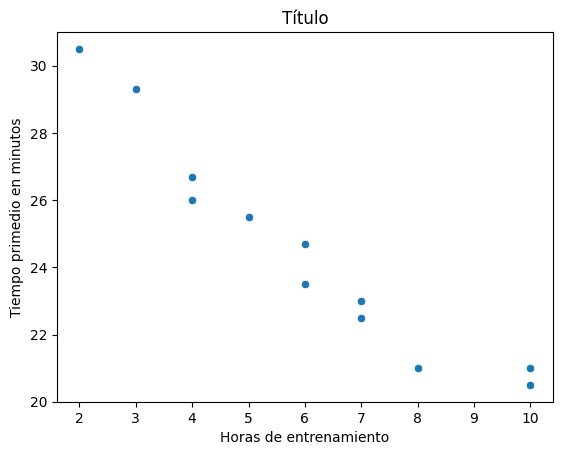

In [ ]:
sns.scatterplot(x=horas_entrenamiento, y=tiempo_promedio_en_mins)
plt.xlabel('Horas de entrenamiento')
plt.ylabel('Tiempo primedio en minutos')
plt.title('Título')
plt.show()

Hay una correlación negativa fuerte entre los atributos. Mirando el gráfico, podríamos decir que la recta sí será de utilidad.

###3.b)

Indique la ecuación del error cuadrático medio que se debería minimizar si se utilizara la técnica de descenso de gradiente.

**Respuesta:**

La ecuación de predicción es del tipo $ \hat{y}=wx+b$, donde w es el coeficiente de la variable independiente x y b es el sesgo (intercepto).

$$
MSE = \frac{1}{m} \sum_{i=1}^{m} (y_i - \hat{y}_i)^2 \\
$$

Tengo los puntos: (2, 30.5), (3, 29.3), (4, 26.7), (4, 26.0), (5, 25.5), (6, 24.7), (6, 23.5), (7, 23.0), (7, 22.5), (8, 21.0), (10, 21.0), (10, 20.5)

$$
MSE = \frac{1}{12}[(2 - w_0 - 30.5w_1)² + (3-w_0-29.3w_1)² + (4-w_0-26.7w_1)² + (4-w_0- 26.0w_1)² + (5-w_0-25.5w_1)² + (6-w_0-24.7w_1)² + (6-w_0-23.5w_1)² + (7-w_0-23.0w_1)² + (7-w_0-22.5w_1)² + (8-w_0-21.0w_1)² + (10-w_0 - 21.0w_1)² + (10-w_0-20.5w_1)²]\\
$$

$$
MSE = \frac{1}{12}[(4 +w_0² +930.25w_1² -4w_0 -122w_1+60.1w_0w_1) + (9+w_0²+854,49w_1²-6w_0-178,5w_1+58,6w_0w_1)+(16+w_0²+650,25w_1²-8w_0-244w_1+534w_0w_1)+(16+w_0²+675w_1²-8w_0-208w_1+52w_0w_1)+(25+w0²+650,25w_1²-10w_0-255w_1+51w_0w_1)+(36+w_0²+610,09w_1²-12w_0-296,4w_1+494w_0w_1)+(36+w_0²+552,25w_1²-12w_0-28,2w_1+47w_0w_1)+(49+w_0²+529w_1²-14w_0-315w_1+45w_0w_1)+(49+w_0²+506,25w_1²-14w_0-315w_1+45w_0w_1)+(100+w_0²+441w_1²-100w_0-2100w_1+42w_0w_1)+(100+w_0²+420,25w_1²-100w_0-2050w_1+41w_0w_1)] \\
$$

$$
MSE = \frac{1}{12}[440+12w_0²+6823.08w_1²-288w_0-6119w_1+1470.6w_0w_1]
$$

Derivadas parciales:

$$
\frac{df}{dw_0} = \frac{24w_0-288+1470.6w_1}{12}\\
$$

$$
\frac{df}{dw_1} = \frac{13646.16w_1-6119+1470.6w_0}{12}\\
$$

Calcular vector gradiente

$$
\nabla\xi = <\frac{df}{dw_0} , \frac{df}{dw_1}> = < \frac{24w_0-288+1470.6w_1}{12} , \frac{13646.16w_1-6119+1470.6w_0}{12}>
$$

Actualizar pesos:
$$
w(t+1) = w(t)- \alpha * \nabla\xi w(t)
$$

###3.c)

**Indique la ecuación de error que se minimiza al utilizar la técnica de descenso de gradiente estocástico. ¿Qué ventaja tiene su uso con respecto a la ecuación indicada en b)?**

$$
Error = (y_i - (wx_i +b))^2
$$

Calcula el error cuadŕatico medio para una sola muestra i en cada iteración.
La ventaja es que realiza actualizaciones más rápido y con más frecuencia, lo que permite encontrar una solución óptima más rápido , por lo que es adecuado para conjuntos de datos grandes.

###3.d)

**Utilice la técnica de descenso de gradiente estocástico para obtener los coeficientes de la recta de regresión que permita predecir el tiempo promedio que un corredor tardará en recorrer la distancia fija a partir de las horas de entrenamiento semanales.**


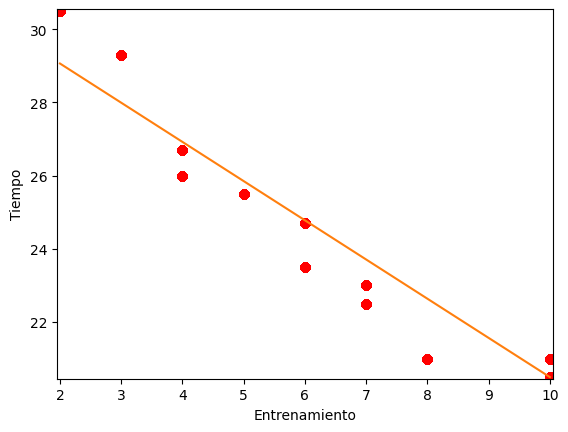

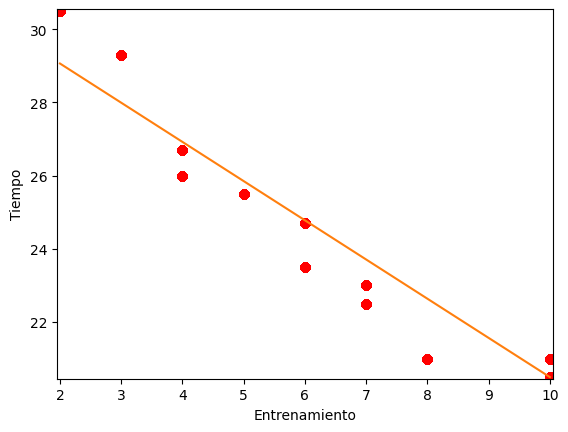

In [27]:
X_train =  horas_entrenamiento.reshape(-1,1)
Y_train = tiempo_promedio_en_mins.reshape(-1,1)

print(f'X_train shape: {X_train.shape} \nY_train shape: {Y_train.shape}')

modelo = NeuronaLineal(alpha=0.01, n_iter=500, cotaE=0.001, draw=1, title=['Entrenamiento', 'Tiempo'])
modelo.fit(X_train, Y_train)


In [29]:
print(f'Pesos: \nW: {modelo.w_} \nBias: {modelo.b_}')

Pesos: 
W: [-1.07113815] 
Bias: [31.20615169]


In [24]:
    # W=-0.9013    B=29.5201
    # W=-1.1301    B=31.2102
    # W=-0.7080    B=30.0401

In [28]:
print(mse(-0.9013,29.5201, X_train, Y_train))
print(mse(-1.1301,31.2102, X_train, Y_train))
print(mse(-0.7080,30.0401, X_train, Y_train))

[1.50003643]
[0.80377055]
[3.90930308]


###3.e)

**Utilice la recta obtenida en d) para predecir el tiempo promedio que tardará en recorrer la distancia fija un corredor que entrena 9 horas semanales.**

***Respuesta:***

De acuerdo a los valores que obtuve en el punto anterior, el tiempo promedio está determinado por:

$\mathrm y = -1.07113146 * x + 31.20608475 $

reemplanzado $\mathrm x$ por las horas:

$\mathrm y = -1.07113146 * 9 + 31.20608475 $


In [ ]:
print(f'Tiempo promedio: {-1.07113146 * 9 + 31.20608475} minutos.')

Tiempo promedio: 21.565901609999997 minutos.


In [ ]:
horas = 9
mins = modelo.predict([horas])

print(f'Tiempo promedio en minutos que predice el modelo: {mins[0]}')

In [ ]:
sns.scatterplot(x=horas_entrenamiento, y=tiempo_promedio_en_mins)
sns.scatterplot(x=[horas], y=mins, markers=True)
plt.show()

## Ejercicio 4

El archivo CCPP.csv contiene 9568 datos de una central de ciclo combinado recolectados entre 2006 y 2011.
Usando la totalidad de los ejemplos se entrenaron 5 combinadores lineales con el objetivo de predecir el valor del atributo PE correspondiente a la cantidad de energía producida a partir del atributo AT (más detalles de este conjunto de datos aquí). Indique cuáles son los dos combinadores lineales con menor error cuadrático promedio a la hora de predecir el valor de PE en función de AT:

a) W = -2.00 ; b= 500

b) W = -2.21 ; b= 498

c) W = -2.30 ; b= 497

d) W = -2.22 ; b=496.5

e) W = -2.16 ; b=496.91


In [ ]:
url_ccpp = '/content/drive/MyDrive/DeepLearning-colab/Datos-20240901/CCPP.csv'
datos_ccpp = pd.read_csv(url_ccpp)

In [ ]:
datos_ccpp.head()

In [ ]:
sns.scatterplot(x='AT', y='PE', data=datos_ccpp)
plt.show()

###Cálculo MSE

In [25]:
def mse(w,b, X, Y):
  sumaError = 0

  for i in range(len(X)):
    error = (Y[i] - (w*X[i] + b))**2
    sumaError += error

  return sumaError/len(X)

In [ ]:
X = datos_ccpp['AT'].values.reshape(-1,1)
Y = datos_ccpp['PE'].values.reshape(-1,1)


In [ ]:
print(f'Combinador lineal 1: W=-2.00, b=500 MSE= {mse(-2.00, 500, X, Y)}')

print(f'Combinador lineal 2: W=-2.21, b=498 MSE= {mse(-2.21, 498, X, Y)}')

print(f'Combinador lineal 3: W=-2.30, b=497 MSE= {mse(-2.30, 497, X, Y)}')

print(f'Combinador lineal 4: W=-2.22, b=496.5 MSE= {mse(-2.22, 496.5, X, Y)}')

print(f'Combinador lineal 5: W=-2.16, b=496.91 MSE= {mse(-2.16, 496.91, X, Y)}')

**Los combinadores lineales con menor error cuadrático medio son:**
* **Combinador 4**: W=-2.22, b=496.5, MSE=31,7856
* **Combinador 5**: W=-2.16, b=496.91, MSE=29,4485

## Ejercicio 5

A partir de los ejemplos del archivo automobile-simple.csv, utilizado en la práctica anterior, se entrenará un combinador lineal para predecir el precio del auto (atributo “price”) en función del tamaño del motor (atributo “engine-size”):


In [30]:
url = '/content/drive/MyDrive/DeepLearning-colab/Datos-20240901/automobile-simple.csv'
autos_df = pd.read_csv(url)

In [31]:
autos = autos_df.copy()

In [32]:
autos.head()

,make,fuel-type,num-of-doors,body-style,curb-weight,engine-size,horsepower,city-mpg,highway-mpg,price,volume,eco-rating
0,alfa-romero,gas,two,convertible,2548,130,111.0,21,27,13495.0,528019.904,33.297462
1,alfa-romero,gas,two,convertible,2548,130,111.0,21,27,16500.0,528019.904,33.297462
2,alfa-romero,gas,two,hatchback,2823,152,154.0,19,26,16500.0,587592.640,30.898272
3,audi,gas,four,sedan,2337,109,102.0,24,30,13950.0,634816.956,42.697819
4,audi,gas,four,sedan,2824,136,115.0,18,22,17450.0,636734.832,27.997459


In [33]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   make          205 non-null    object 
 1   fuel-type     205 non-null    object 
 2   num-of-doors  203 non-null    object 
 3   body-style    205 non-null    object 
 4   curb-weight   205 non-null    int64  
 5   engine-size   205 non-null    int64  
 6   horsepower    203 non-null    float64
 7   city-mpg      205 non-null    int64  
 8   highway-mpg   205 non-null    int64  
 9   price         201 non-null    float64
 10  volume        205 non-null    float64
 11  eco-rating    205 non-null    float64
dtypes: float64(4), int64(4), object(4)
memory usage: 19.3+ KB


###a)  Completar datos faltantes.

Antes de comenzar con el entrenamiento, complete los datos faltantes del
atributo “price” utilizando el valor promedio.


In [34]:
autos.isnull().sum()

,0
make,0
fuel-type,0
num-of-doors,2
body-style,0
curb-weight,0
engine-size,0
horsepower,2
city-mpg,0
highway-mpg,0
price,4


In [35]:
media = float(int(autos['price'].mean()))

In [36]:
autos.loc[autos['price'].isnull()]

,make,fuel-type,num-of-doors,body-style,curb-weight,engine-size,horsepower,city-mpg,highway-mpg,price,volume,eco-rating
9,audi,gas,two,hatchback,3053,131,160.0,16,22,NaN,629188.560,25.008890
44,isuzu,gas,two,sedan,1874,90,70.0,38,43,NaN,515592.480,65.105613
45,isuzu,gas,four,sedan,1909,90,70.0,38,43,NaN,515592.480,64.755162
129,porsche,gas,two,hatchback,3366,203,288.0,17,28,NaN,641507.055,29.678270


In [37]:
autos['price'].fillna(media, inplace=True)

In [38]:
autos.loc[44]

,44
make,isuzu
fuel-type,gas
num-of-doors,two
body-style,sedan
curb-weight,1874
engine-size,90
horsepower,70.0
city-mpg,38
highway-mpg,43
price,13207.0


In [39]:
autos = autos.dropna().copy()

In [40]:
autos.shape

(201, 12)

### b) Entrenar combinador

Luego de completar según lo indicado en a), realice el entrenamiento del combinador lineal:

i. Sin normalizar los atributos.

ii. Normalizando ambos atributos linealmente.

iii. Normalizando ambos atributos utilizando media y desvío.

Analice el impacto de la normalización en el entrenamiento. ¿Qué resultados obtuvo sin normalizar los atributos? ¿Alguna de las normalizaciones es mejor? Explique.

#### i. Sin normalizar los atributos.

In [41]:
modelo = NeuronaLineal(alpha=0.02, n_iter=50, cotaE=10e-05)

In [42]:
# Y = price, x = engine_size

Y = autos['price'].values.reshape(-1,1)
X_original = autos['engine-size'].values.reshape(-1,1)

In [43]:
modelo1 = modelo.fit(X_original,Y)

print(f'Pesos: \nW: {modelo1.w_} \nBias: {modelo1.b_}')

Pesos: 
W: [nan] 
Bias: [nan]


/content/drive/MyDrive/DeepLearning-colab/Fuentes-20240901/ClassNeuronaLineal.py:84: RuntimeWarning: overflow encountered in square
  ErrorAct += errorXi**2
/content/drive/MyDrive/DeepLearning-colab/Fuentes-20240901/ClassNeuronaLineal.py:78: RuntimeWarning: invalid value encountered in add
  self.w_ += update * xi
/content/drive/MyDrive/DeepLearning-colab/Fuentes-20240901/ClassNeuronaLineal.py:80: RuntimeWarning: invalid value encountered in add
  self.b_ += update


In [44]:
print(f'MSE= {mse(modelo1.w_, modelo1.b_, X_original, Y)}')

MSE= [nan]


####ii. Normalizando ambos atributos linealmente.

In [45]:
norm_lineal = preprocessing.MinMaxScaler()

In [46]:
X = norm_lineal.fit_transform(autos['engine-size'].values.reshape(-1,1))

In [47]:
modelo2 = modelo.fit(X,Y)

print(f'Pesos: \nW: {modelo2.w_} \nBias: {modelo2.b_}')

Pesos: 
W: [42428.19434044] 
Bias: [2520.84240698]


In [48]:
print(f'MSE con normalización lineal: {mse(modelo2.w_, modelo2.b_, X, Y)}')

MSE con normalización lineal: [16010379.02438338]


####iii. Normalizando ambos atributos utilizando media y desvío.

In [49]:
avgstd_norm = preprocessing.StandardScaler()

In [50]:
X = avgstd_norm.fit_transform(autos['engine-size'].values.reshape(-1,1))

In [51]:
modelo3 = modelo.fit(X,Y)

print(f'Pesos: \nW: {modelo3.w_} \nBias: {modelo3.b_}')

Pesos: 
W: [6578.09385503] 
Bias: [13127.80117797]


In [52]:
print(f'MSE con normalización media y desvío: {mse(modelo3.w_, modelo3.b_, X,Y)}')

MSE con normalización media y desvío: [16046098.65157177]


# Regresión Lineal Múltiple (dos o más variables de entrada)

## Ejercicio 6

Utilice los scripts disponibles en la teoría y práctica para entrenar un combinador lineal. El modelo debe recibir tres dígitos binarios y retornar la representación decimal del número que resulta de la combinación de dígitos (para las entradas 000, 010 y 101 debe obtener las salidas 0, 2 y 5, respectivamente)

a) Utilizando el bias o peso W0 (comportamiento normal)

b) Utilizando únicamente las tres entradas correspondientes a los dígitos binarios anulando el bias o W0 del cálculo.

Compare la cantidad de iteraciones necesarias para obtener el vector de pesos correcto en ambos casos.
Observe el valor del arco correspondiente al bias en a).

In [ ]:
ejemplos = pd.DataFrame({'X': [0,0,0,0,1,1,1,1],
                         'Y': [0,0,1,1,0,0,1,1],
                         'Z': [0,1,0,1,0,1,0,1]})

label = pd.DataFrame({'label': [0,1,2,3,4,5,6,7]})

label = label.values.reshape(-1,1)
label.shape

(8, 1)

In [ ]:
modelo = NeuronaLineal(alpha=0.05, n_iter=5000, cotaE=1e-6, draw=1)

In [ ]:
modelo4 = modelo.fit(ejemplos.values, label)

print(f'Pesos: \nW: {modelo4.w_} \nBias: {modelo4.b_} \nIteraciones: {modelo4.total_iter_}')

Pesos: 
W: [3.99906933 1.99904438 0.99903922] 
Bias: [0.00183354] 
Iteraciones: 126


In [ ]:
print(modelo4.predict([0,1,0]))

2.0000841801636464


In [ ]:
modelo5 = modelo.fit(ejemplos.values, label, False)

print(f'Pesos: \nW: {modelo5.w_} \nBias: {modelo5.b_} \nIteraciones: {modelo5.total_iter_}')

Pesos: 
W: [3.99906517 2.00008418 1.00087948] 
Bias: 0 
Iteraciones: 74


In [ ]:
print(modelo5.predict([0,1,0]))

2.0000841801636464


## Ejercicio 7

Utilizando los atributos numéricos del archivo Autos.csv entrene un combinador lineal para predecir el precio del auto en función del resto de los atributos. Tenga en cuenta la existencia de valores faltantes.
Realice varias ejecuciones y observe los vectores de pesos obtenidos. ¿Puede identificar cuáles son los atributos con mayor incidencia en la determinación del precio? Explique.

In [53]:
autos_df['num-of-doors'].unique()

array(['two', 'four', nan], dtype=object)

In [54]:
autos_df['fuel-type'].unique()

array(['gas', 'diesel'], dtype=object)

In [55]:
autos_copy = autos_df.copy()

In [56]:
# autos_copy['num_of_doors'] = autos_df['num-of-doors'].map({'two':2, 'four':4})
# autos_copy['fuel_type'] = autos_df['fuel-type'].map({'gas':0, 'diesel':1})

autos_copy

,make,fuel-type,num-of-doors,body-style,curb-weight,engine-size,horsepower,city-mpg,highway-mpg,price,volume,eco-rating
0,alfa-romero,gas,two,convertible,2548,130,111.0,21,27,13495.0,528019.904,33.297462
1,alfa-romero,gas,two,convertible,2548,130,111.0,21,27,16500.0,528019.904,33.297462
2,alfa-romero,gas,two,hatchback,2823,152,154.0,19,26,16500.0,587592.640,30.898272
3,audi,gas,four,sedan,2337,109,102.0,24,30,13950.0,634816.956,42.697819
4,audi,gas,four,sedan,2824,136,115.0,18,22,17450.0,636734.832,27.997459
...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo,gas,four,sedan,2952,141,114.0,23,28,16845.0,721961.760,38.354298
201,volvo,gas,four,sedan,3049,141,160.0,19,25,19045.0,720913.920,32.043335
202,volvo,gas,four,sedan,3012,173,134.0,18,23,21485.0,721961.760,29.806494
203,volvo,diesel,four,sedan,3217,145,106.0,26,27,22470.0,721961.760,35.073342


In [57]:
autos_num = autos_copy.select_dtypes(include= [np.number])

In [58]:
autos_num

,curb-weight,engine-size,horsepower,city-mpg,highway-mpg,price,volume,eco-rating
0,2548,130,111.0,21,27,13495.0,528019.904,33.297462
1,2548,130,111.0,21,27,16500.0,528019.904,33.297462
2,2823,152,154.0,19,26,16500.0,587592.640,30.898272
3,2337,109,102.0,24,30,13950.0,634816.956,42.697819
4,2824,136,115.0,18,22,17450.0,636734.832,27.997459
...,...,...,...,...,...,...,...,...
200,2952,141,114.0,23,28,16845.0,721961.760,38.354298
201,3049,141,160.0,19,25,19045.0,720913.920,32.043335
202,3012,173,134.0,18,23,21485.0,721961.760,29.806494
203,3217,145,106.0,26,27,22470.0,721961.760,35.073342


In [59]:
autos_num.shape

(205, 8)

In [60]:
target = 'price'

autos_num.isnull().sum()

,0
curb-weight,0
engine-size,0
horsepower,2
city-mpg,0
highway-mpg,0
price,4
volume,0
eco-rating,0


In [61]:
autos_num = autos_num.dropna().copy()

print(f'Shape: {autos_num.shape}')
autos_num.isnull().sum()

Shape: (199, 8)


,0
curb-weight,0
engine-size,0
horsepower,0
city-mpg,0
highway-mpg,0
price,0
volume,0
eco-rating,0


###Separación  datos de entrenamiento y test:

In [62]:
X = autos_num.drop(target, axis=1)
Y = autos_num[target].values.reshape(-1, 1)

In [63]:
print(f'X shape: {X.shape} \nY shape: {Y.shape}')

X shape: (199, 7) 
Y shape: (199, 1)


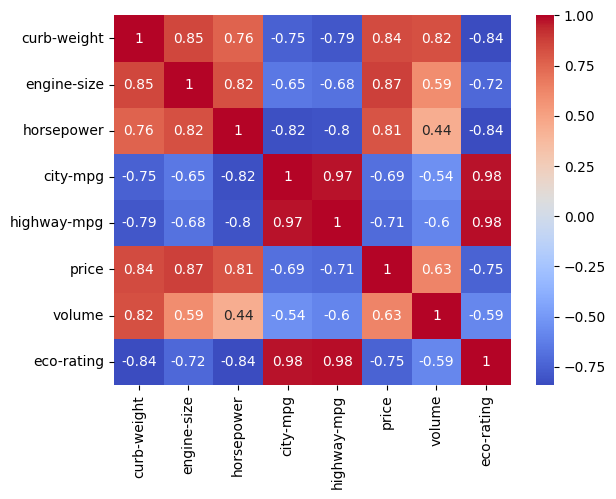

In [64]:
corr_matrix = autos_num.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [65]:
X_norm = preprocessing.StandardScaler().fit_transform(X)

In [66]:
X_norm.shape

(199, 7)

In [67]:
alfa = 0.05
iteraciones = 5000
cota = 1e-6

modelo = NeuronaLineal(alpha=alfa, n_iter=iteraciones, cotaE=cota)

modelo_ej_7 = modelo.fit(X_norm, Y)

print(f'Pesos: {modelo_ej_7.w_} \nbias: {modelo_ej_7.b_} \nIteraciones: {modelo_ej_7.total_iter_} \nErrores: {modelo_ej_7.errors_}')

Pesos: [ 3991.52583284  2461.59773261  1825.59923424  -888.84714497
  1575.33202374    63.35418415 -1914.25878049] 
bias: [13536.51148755] 
Iteraciones: 977 
Errores: [array([8.74560009e+09]), array([2.84623615e+09]), array([2.73889084e+09]), array([2.68532725e+09]), array([2.65576615e+09]), array([2.63879131e+09]), array([2.62875736e+09]), array([2.62270126e+09]), array([2.61899668e+09]), array([2.61671765e+09]), array([2.61532086e+09]), array([2.61447965e+09]), array([2.61399371e+09]), array([2.61373812e+09]), array([2.61363382e+09]), array([2.61363008e+09]), array([2.61369386e+09]), array([2.61380336e+09]), array([2.61394395e+09]), array([2.61410567e+09]), array([2.61428161e+09]), array([2.61446691e+09]), array([2.61465809e+09]), array([2.61485264e+09]), array([2.61504868e+09]), array([2.61524484e+09]), array([2.6154401e+09]), array([2.61563367e+09]), array([2.61582497e+09]), array([2.61601356e+09]), array([2.61619911e+09]), array([2.61638139e+09]), array([2.61656021e+09]), array([2

# Regresión Logística Múltiple (varias variables de entrada y salida sigmoide en (0,1) o (-1,1) )

## Ejercicio 8

A partir de los ejemplos del archivo automobile-simple.csv, utilice todos los ejemplos para generar un modelo de 1 neurona para clasificar si un auto es ecológico:

<ol type="a">
<li>Elimine los registros que presenten valores faltantes y utilice el atributo eco-rating para generar un nuevo atributo binario que determine si un auto es ecológico o no. Considere que un auto es ecológico si el valor de "eco-rating" supera la media de dicho atributo.</li>

<li>Luego de completar según lo indicado en a), aplique normalización y realice el entrenamiento utilizando los atributos numéricos:</li>
  <ol type="i">
      <li>Utilizando salida sigmoide (sigmoid) para la neurona.</li>
      <li>Utilizando salida tangente hiperbólico (tanh) para la neurona.</li>
  </ol>
</ol>


In [ ]:
autos_ej8 = autos_df.select_dtypes(include=np.number)

In [ ]:
autos_ej8 = autos_ej8.dropna().copy()

autos_ej8.isnull().sum()

,0
curb-weight,0
engine-size,0
horsepower,0
city-mpg,0
highway-mpg,0
price,0
volume,0
eco-rating,0


In [ ]:
mean = autos_ej8['eco-rating'].mean()

autos_ej8['is-eco'] = autos_ej8['eco-rating'].apply(lambda x: 1 if x > mean else 0)

autos_ej8

,curb-weight,engine-size,horsepower,city-mpg,highway-mpg,price,volume,eco-rating,is-eco
0,2548,130,111.0,21,27,13495.0,528019.904,33.297462,0
1,2548,130,111.0,21,27,16500.0,528019.904,33.297462,0
2,2823,152,154.0,19,26,16500.0,587592.640,30.898272,0
3,2337,109,102.0,24,30,13950.0,634816.956,42.697819,1
4,2824,136,115.0,18,22,17450.0,636734.832,27.997459,0
...,...,...,...,...,...,...,...,...,...
200,2952,141,114.0,23,28,16845.0,721961.760,38.354298,0
201,3049,141,160.0,19,25,19045.0,720913.920,32.043335,0
202,3012,173,134.0,18,23,21485.0,721961.760,29.806494,0
203,3217,145,106.0,26,27,22470.0,721961.760,35.073342,0


In [ ]:
target = 'is-eco'
ejemplos = autos_ej8.drop(target, axis=1)
label = autos_ej8[target]

X_train, X_test, y_train, y_test = train_test_split(ejemplos, label, test_size=0.2)

ejemplos_norm = preprocessing.StandardScaler().fit_transform(X_train)
label = preprocessing.StandardScaler().fit_transform(y_train.values.reshape(-1,1))

X_test = preprocessing.StandardScaler().fit_transform(X_test)

ejemplos_norm.shape, label.shape

((159, 8), (159, 1))

In [ ]:
alfa = 0.01
iteraciones = 5000
cota = 0.001

modelo_sigmoide = NeuronaGradiente(alpha=alfa, n_iter=iteraciones, cotaE=cota, FUN='sigmoid', draw=1)
modelo_tan = NeuronaGradiente(alpha=alfa, n_iter=iteraciones, cotaE=cota, FUN='tanh', draw=1)

In [ ]:
modelo_sigmoide.fit(ejemplos_norm, label)
print(f'Iteraciones: {modelo_sigmoide.i_}')

Iteraciones: 1483


In [ ]:
modelo_sigmoide.accuracy(X_test, y_test)

0.9

In [ ]:
modelo_tan.fit(ejemplos_norm, label)

print(f'Iteraciones: {modelo_tan.i_}')

Iteraciones: 1112


In [ ]:
y_test_tan = y_test.apply(lambda x: 1 if x == 1 else -1)

y_test_tan.values.reshape(1,-1)

array([[ 1, -1, -1,  1, -1, -1, -1, -1,  1, -1,  1,  1, -1,  1,  1, -1,
        -1,  1,  1, -1, -1, -1,  1, -1, -1, -1,  1, -1,  1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1,  1,  1]])

In [ ]:
modelo_tan.accuracy(X_test, y_test_tan)

0.775

## Ejercicio 10

Se ha realizado un análisis químico a tres tipos distintos de vinos producidos en una misma región de Italia.
El número de muestras considerado es el siguiente:

<p align="center">
Tipo 1 ➔ 59 muestras, Tipo 2 ➔ 71 muestras, Tipo 3 ➔48 muestras
</p>

El archivo **Vinos.csv** permite observar los resultados de este análisis. Cada fila representa una muestra distinta y está formada, en primer lugar, por el número del tipo al cual pertenece el vino analizado seguido por los 13 atributos que lo caracterizan.
Por ejemplo, la siguiente fila:
<p align="center">
<strong> 2, 12.29, 3.17, 2.21, 18, 88, 2.85, 2.99, 0.45, 2.81, 2.3, 1.42, 2.83, 406 </strong>
</p>

es el resultado del análisis de un vino correspondiente al tipo 2 (1er. valor de la fila) seguido por 13 valores
separados por comas que indican los niveles de las mediciones realizadas a dicho vino.

<ol type="a">
  <li>Entrene una red neuronal formada por una única neurona para clasificar los vinos de Tipo 1</li>
</ol>

Realice 30 ejecuciones independientes utilizando el 50%, 60%, 70%, 80% y 90% de los ejemplos como entrenamiento y el resto como testeo. Para cada porcentaje, indique la cantidad promedio de ejemplos correctamente clasificados en entrenamiento y en testeo. Calcule también el promedio y el desvío de la cantidad de iteraciones realizadas.

Utilice un máximo de 400 iteraciones y velocidades de aprendizaje 0.1, 0.2 y 0.3.
Analice los resultados obtenidos utilizando:

<ol type="i">
<li>Función de activación ‘sigmoid’ y función de costo ‘ECM’ (error cuadrático medio)</li>
<li>Función de activación ‘sigmoid’ y función de costo ‘EC_binaria’ (entropía cruzada binaria)</li>
<li>Función de activación ‘tanh’ y función de costo ‘ECM’ (error cuadrático medio)</li>
</ol>

In [ ]:
vinos = pd.read_csv('/content/drive/MyDrive/DeepLearning-colab/Datos-20240901/Vinos.csv', delimiter= ';')

In [ ]:
vinos.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
vinos.isnull().sum()

,0
Class,0
Alcohol,0
Malic acid,0
Ash,0
Alcalinity of ash,0
Magnesium,0
Total phenols,0
Flavanoids,0
Nonflavanoid phenols,0
Proanthocyanins,0


In [ ]:
vinos.shape

(178, 14)

### Función

In [ ]:
def ejercicio_10(X, Y, fun_activacion, fun_costo):
  porcentajes_test = [0.5, 0.6, 0.7, 0.8, 0.9]
  alfas = [0.1, 0.2, 0.3]
  iteraciones = 400
  cota = 1e-03

  for a in alfas:
    print(f'*********** Alfa: {a} ***********')
    for porcentaje in porcentajes_test:
      print(f'Porcentaje test: {porcentaje}')
      # cálculos
      iter = []
      accuracy_test = 0
      accuracy_train = 0

      for i in range(30):
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=porcentaje)

        # normalizar
        X_train = preprocessing.StandardScaler().fit_transform(X_train)
        X_test = preprocessing.StandardScaler().fit_transform(X_test)

        if (fun_activacion == 'tanh'):
          y_test = y_test.apply(lambda x: 1 if x == 1 else -1)
          y_train = y_train.apply(lambda x: 1 if x == 1 else -1)

        modelo = NeuronaGradiente(alpha=a, n_iter=iteraciones, cotaE=cota, FUN=fun_activacion, COSTO=fun_costo)

        modelo.fit(X_train, y_train)

        iter.append(modelo.i_)
        accuracy_test += modelo.accuracy(X_test, y_test)
        accuracy_train += modelo.accuracy(X_train, y_train)

      print(f'Iteraciones: \n promedio: {np.mean(iter)} \n desvío: {np.std(iter)}')
      print(f'Cantidad promedio de ejemplos correctamente clasificados: \n Train: {accuracy_train/30} \n Test: {accuracy_test/30}')
      print('-----------------------------------------------------')


In [ ]:
vinos.Class.unique()

array([1, 2, 3])

In [ ]:
target = 'Class'
X = vinos.drop(target, axis=1)
Y = (vinos[target] == 1)*1

print(f'X shape: {X.shape} \nY shape: {Y.shape}')

X shape: (178, 13) 
Y shape: (178,)


### Sigmoide + ECM

In [ ]:
ejercicio_10(X, Y,'sigmoid', 'ECM')

*********** Alfa: 0.1 ***********
Porcentaje test: 0.5
Iteraciones: 
 promedio: 128.06666666666666 
 desvío: 11.800941582018877
Cantidad promedio de ejemplos correctamente clasificados: 
 Train: 1.0 
 Test: 0.9887640449438205
-----------------------------------------------------
Porcentaje test: 0.6
Iteraciones: 
 promedio: 122.1 
 desvío: 15.415035949790495
Cantidad promedio de ejemplos correctamente clasificados: 
 Train: 1.0 
 Test: 0.9825545171339568
-----------------------------------------------------
Porcentaje test: 0.7
Iteraciones: 
 promedio: 105.46666666666667 
 desvío: 14.407713983218235
Cantidad promedio de ejemplos correctamente clasificados: 
 Train: 1.0 
 Test: 0.9736
-----------------------------------------------------
Porcentaje test: 0.8
Iteraciones: 
 promedio: 98.7 
 desvío: 18.917628463067636
Cantidad promedio de ejemplos correctamente clasificados: 
 Train: 1.0 
 Test: 0.9668997668997668
-----------------------------------------------------
Porcentaje test: 0.9


###Sigmoide + EC_Binaria

In [ ]:
ejercicio_10(X,Y,'sigmoid','EC_binaria')

*********** Alfa: 0.1 ***********
Porcentaje test: 0.5
Iteraciones: 
 promedio: 399.8333333333333 
 desvío: 0.8975274678557509
Cantidad promedio de ejemplos correctamente clasificados: 
 Train: 1.0 
 Test: 0.9790262172284645
-----------------------------------------------------
Porcentaje test: 0.6
Iteraciones: 
 promedio: 399.8 
 desvío: 0.9092121131323904
Cantidad promedio de ejemplos correctamente clasificados: 
 Train: 1.0 
 Test: 0.984735202492212
-----------------------------------------------------
Porcentaje test: 0.7
Iteraciones: 
 promedio: 389.06666666666666 
 desvío: 15.983185609327768
Cantidad promedio de ejemplos correctamente clasificados: 
 Train: 1.0 
 Test: 0.9736
-----------------------------------------------------
Porcentaje test: 0.8
Iteraciones: 
 promedio: 345.9 
 desvío: 31.753582475053108
Cantidad promedio de ejemplos correctamente clasificados: 
 Train: 1.0 
 Test: 0.9694638694638698
-----------------------------------------------------
Porcentaje test: 0.9
I

###Tanh + ECM

In [ ]:
ejercicio_10(X,Y,'tanh','ECM')

*********** Alfa: 0.1 ***********
Porcentaje test: 0.5
Iteraciones: 
 promedio: 58.4 
 desvío: 7.24154679609267
Cantidad promedio de ejemplos correctamente clasificados: 
 Train: 1.0 
 Test: 0.9760299625468165
-----------------------------------------------------
Porcentaje test: 0.6
Iteraciones: 
 promedio: 55.233333333333334 
 desvío: 7.614386967372283
Cantidad promedio de ejemplos correctamente clasificados: 
 Train: 0.9995305164319249 
 Test: 0.9828660436137074
-----------------------------------------------------
Porcentaje test: 0.7
Iteraciones: 
 promedio: 50.5 
 desvío: 8.180260794538684
Cantidad promedio de ejemplos correctamente clasificados: 
 Train: 0.9993710691823899 
 Test: 0.9738666666666667
-----------------------------------------------------
Porcentaje test: 0.8
Iteraciones: 
 promedio: 42.06666666666667 
 desvío: 8.22570496809983
Cantidad promedio de ejemplos correctamente clasificados: 
 Train: 1.0 
 Test: 0.9706293706293707
-----------------------------------------

# Regresión Logística multiclase

## Ejercicio 11

Se busca predecir si el tipo de fármaco que se debe administrar a un paciente afectado de rinitis alérgica es el habitual o no. Se dispone de información correspondiente a las historias clínicas de pacientes atendidos previamente

<ol type="a">
<li> Numerice los atributos nominales y utilice el archivo <strong>Drug_train.csv</strong> para entrenar un modelo con 5 neuronas que sea capaz de predecir el tipo de fármaco que se debe administrar a un paciente afectado de rinitis alérgica.
</li>
<li>Luego utilice el archivo <strong>Drug_test.csv</strong> para medir la calidad del modelo.
</li>
</ol>

In [ ]:
drug_train= pd.read_csv('')
drug_test= pd.read_csv('')

## Ejercicio 12

Utilice una red neuronal formada por una única capa de salida de 3 neuronas para clasificar las muestras de vino del archivo Vinos.csv descripto en el ejercicio anterior.

Realice 30 ejecuciones independientes utilizando el 60% y 80% de los ejemplos como entrenamiento y el resto como testeo.

Utilice un máximo de 400 iteraciones y velocidades de aprendizaje 0.1, 0.2 y 0.3.
Complete la siguiente tabla con los resultados de las siguientes configuraciones:
<ol type="a">
<li>Función de activación ‘sigmoid’ y función de costo ‘ECM’ (error cuadrático medio)</li>
<li>Función de activación ‘sigmoid’ y función de costo ‘EC_binaria’ (entropía cruzada binaria)</li>
<li>Función de activación ‘tanh’ y función de costo ‘ECM’ (error cuadrático medio)</li>
<li>Capa ‘Softmax’ y función de costo ‘EC’ (entropía cruzada)</li>
</ol>

In [ ]:
def ejercicio_12(X, Y, fun_activacion, fun_costo):
  porcentajes_test = [0.4, 0.2]
  alfas = [0.1, 0.2, 0.3]
  iteraciones= 400
  cota= 1e-03

  for a in alfas:
    print(f'******** Alfa: {a} *********')
    for porcentaje in porcentajes_test:
      print(f'- Procentaje: {porcentaje}')
      accuracy_test = 0
      accuracy_train = 0
      for i in range(30):
        modelo = RNMulticlase(alpha=a, n_iter=iteraciones, cotaE=cota, FUN=fun_activacion, COSTO=fun_costo)

        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=porcentaje)

        # normalizar por media y desvío
        X_train = preprocessing.StandardScaler().fit_transform(X_train)
        X_test = preprocessing.StandardScaler().fit_transform(X_test)

        if (fun_activacion == 'tanh'):
          y_test= y_test.apply(lambda x: 1 if x ==1 else -1)
          y_train= y_train.apply(lambda x: 1 if x ==1 else -1)

        modelo.fit(X_train, y_train)
        # modelo.predict(X_test)

        accuracy_test += modelo.accuracy(X_test, y_test)
        accuracy_train += modelo.accuracy(X_train, y_train)

      print(f'Cantidad promedio de ejemplos correctamente clasificados: \n Train: {accuracy_train/30} \n Test: {accuracy_test/30}')
      print('-----------------------------------------------------')

In [ ]:
Y = vinos[target]
encoder = OneHotEncoder(sparse=False)
y_onehot = encoder.fit_transform(Y.values.reshape(-1, 1))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


###Sigmoid + ECM

In [ ]:
ejercicio_12(X, y_onehot, 'sigmoid', 'ECM')

******** Alfa: 0.1 *********
- Procentaje: 0.4
Cantidad promedio de ejemplos correctamente clasificados: 
 Train: 0.9779874213836482 
 Test: 0.9388888888888887
-----------------------------------------------------
- Procentaje: 0.2
Cantidad promedio de ejemplos correctamente clasificados: 
 Train: 0.9774647887323943 
 Test: 0.9527777777777773
-----------------------------------------------------
******** Alfa: 0.2 *********
- Procentaje: 0.4
Cantidad promedio de ejemplos correctamente clasificados: 
 Train: 0.9861635220125788 
 Test: 0.9351851851851851
-----------------------------------------------------
- Procentaje: 0.2
Cantidad promedio de ejemplos correctamente clasificados: 
 Train: 0.9788732394366199 
 Test: 0.9296296296296298
-----------------------------------------------------
******** Alfa: 0.3 *********
- Procentaje: 0.4
Cantidad promedio de ejemplos correctamente clasificados: 
 Train: 0.9833333333333337 
 Test: 0.9486111111111107
------------------------------------------

### Sigmoid + EC_binaria

In [ ]:
ejercicio_12(X, y_onehot, 'sigmoid', 'EC_binaria')

******** Alfa: 0.1 *********
- Procentaje: 0.4
Cantidad promedio de ejemplos correctamente clasificados: 
 Train: 0.9858490566037739 
 Test: 0.9356481481481481
-----------------------------------------------------
- Procentaje: 0.2
Cantidad promedio de ejemplos correctamente clasificados: 
 Train: 0.9821596244131456 
 Test: 0.9398148148148144
-----------------------------------------------------
******** Alfa: 0.2 *********
- Procentaje: 0.4
Cantidad promedio de ejemplos correctamente clasificados: 
 Train: 0.9896226415094342 
 Test: 0.9351851851851851
-----------------------------------------------------
- Procentaje: 0.2
Cantidad promedio de ejemplos correctamente clasificados: 
 Train: 0.9849765258215961 
 Test: 0.9175925925925925
-----------------------------------------------------
******** Alfa: 0.3 *********
- Procentaje: 0.4
Cantidad promedio de ejemplos correctamente clasificados: 
 Train: 0.9874213836477991 
 Test: 0.9300925925925924
------------------------------------------

### Tanh + ECM

### Softmax + EC

# Ejercicio cuestionario

Se entrenó una neurona no lineal con función de transferencia sigmoide entre -1 y 1 (tanh) para clasificar los 16 ejemplos del archivo Frutas_train.csv. Los ejemplos de entrenamiento fueron normalizados utilizando sklearn.preprocessing.StandardScaler() con sus parámetros por defecto.

Al finalizar el entrenamiento, se obtuvo una neurona no lineal con los siguientes pesos:

W(diámetro) = 2.65, W(color) = -2.5 y b = 0.03.

Cabe aclarar que la neurona obtenida clasifica correctamente los 16 ejemplos de entrenamiento si se considera a las salidas mayor que cero como 1 y a las menores o iguales a cero como -1.

In [15]:
frutas_test = pd.read_csv('/content/drive/MyDrive/DeepLearning-colab/Datos-20240901/FrutasTest.csv')
frutas_train = pd.read_csv('/content/drive/MyDrive/DeepLearning-colab/Datos-20240901/FrutasTrain.csv')

In [6]:

frutas_train

,Diametro,Color,Clase
0,10,200,Naranja
1,20,30,Melon
2,8,150,Naranja
3,26,30,Melon
4,7,170,Naranja
5,24,32,Melon
6,20,170,Naranja
7,21,160,Melon
8,21,180,Naranja
9,23,160,Melon


In [16]:
mean_color = frutas_train.Color.mean()
std_color = frutas_train.Color.std()
mean_diametro = frutas_train.Diametro.mean()
std_diametro = frutas_train.Diametro.std()

In [8]:
target = 'Clase'
X = frutas_train.drop(target, axis=1)
Y = frutas_train[target]

In [9]:
X = preprocessing.StandardScaler().fit_transform(X)

In [10]:
X

array([[-1.50462909,  0.78461053],
       [ 0.23986841, -1.40200899],
       [-1.85352859,  0.14148715],
       [ 1.2865669 , -1.40200899],
       [-2.02797834,  0.3987365 ],
       [ 0.9376674 , -1.37628405],
       [ 0.23986841,  0.3987365 ],
       [ 0.41431816,  0.27011182],
       [ 0.41431816,  0.52736118],
       [ 0.76321765,  0.27011182],
       [ 0.58876791,  0.65598586],
       [ 0.76321765,  0.65598586],
       [ 0.9376674 ,  1.42773392],
       [-0.63238034, -1.38914652],
       [-0.63238034,  1.42773392],
       [ 0.06541866, -1.38914652]])

In [11]:
W_diametro = 2.65
W_color = -2.5
b = 0.03

# Calcular el output para cada entrada

outputs = []
for x1, x2 in X:
    z = (W_diametro * x1) + (W_color * x2) + b
    output = np.tanh(z)
    outputs.append(output)

outputs

[-0.999985544663465,
 0.999523212056899,
 -0.9999433159912223,
 0.9999981414301742,
 -0.9999937867325078,
 0.9999865686232382,
 -0.31958961861843693,
 0.4240859871201031,
 -0.18818979369947963,
 0.8803333569062916,
 -0.049688738333984364,
 0.39064600080878153,
 -0.7835559653419968,
 0.9495374913555276,
 -0.9999409524658176,
 0.9987187833038063]

Indique cuántos ejemplos de entrenamiento resultarían clasificados como “indefinido” si se considera a las salidas mayores o iguales que 0.8 como 1, a las menores o iguales que -0.8 como -1 y a las comprendidas en (-0.8, 0.8) como indefinidas.

In [14]:
indefinidos = [x for x in outputs if x <= 0.8 and x >= -0.8]

len(indefinidos)

6

Considerando a las salidas mayores o iguales que 0.8 como 1, a las menores o iguales que -0.8 como -1 y a las comprendidas en (-0.8, 0.8) como indefinidas, ¿cuál sería la respuesta de la neurona no lineal si se la usa para clasificar una fruta con 14 cm de diámetro y una intensidad de color de 140?

In [17]:
# W(diámetro) = 2.65, W(color) = -2.5 y b = 0.03.

def salida(x_diam, x_color):
  neta = np.tanh(x_diam * 2.65 + x_color * -2.5 + 0.03)
  if neta >= 0.8:
    return 1
  elif neta <= -0.8:
    return -1
  else:
    return 'indefinido'

In [19]:
# Los datos ingresados corresponden a una naranja

salida(-1.50462909, 0.78461053)

-1

In [20]:
# 14 cm de diámetro y una intensidad de color de 140
x_color = (140 - mean_color) / std_color
x_diam = (14 - mean_diametro) / std_diametro

salida(x_diam, x_color)

-1

Considerando a las salidas mayores o iguales que 0.8 como 1, a las menores o iguales que -0.8 como -1 y a las comprendidas en (-0.8, 0.8) como indefinidas, ¿cuál sería la respuesta de la neurona no lineal si se la usa para clasificar una fruta con 16 cm de diámetro y una intensidad de color de 79?

In [21]:
x_color = (79 - mean_color) / std_color
x_diam = (16 - mean_diametro) / std_diametro

salida(x_diam, x_color)

'indefinido'